# EDA on Diabetes Patient

## Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

## Reading CSV

In [2]:
df = pd.read_csv("diabetes.csv")

## Basic Information about data frame

In [3]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**Thus our dataset don't contain any NAN(Empty) Values.**

## Statistical Properties in our dataset

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


**Observation:-** Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI and Outcome fields have minimum value of 0. But Glucose, BloodPressure, Insulin, BMI fields can't have their value as 0. Also Skin Thickness of a person can't be 99mm. Thus these are inappropriate values which are need to be replaced with their mean or median values.

## 10 Random Samples

In [5]:
print(df.sample(10))

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
604            4      183              0              0        0  28.4   
163            2      100             64             23        0  29.7   
129            0      105             84              0        0  27.9   
489            8      194             80              0        0  26.1   
222            7      119              0              0        0  25.2   
543            4       84             90             23       56  39.5   
691           13      158            114              0        0  42.3   
444            4      117             62             12        0  29.7   
265            5       96             74             18       67  33.6   
130            4      173             70             14      168  29.7   

     DiabetesPedigreeFunction  Age  Outcome  
604                     0.212   36        1  
163                     0.368   21        0  
129                     0.741   62        1  
4

##  Univariate Analysis

### Outcome

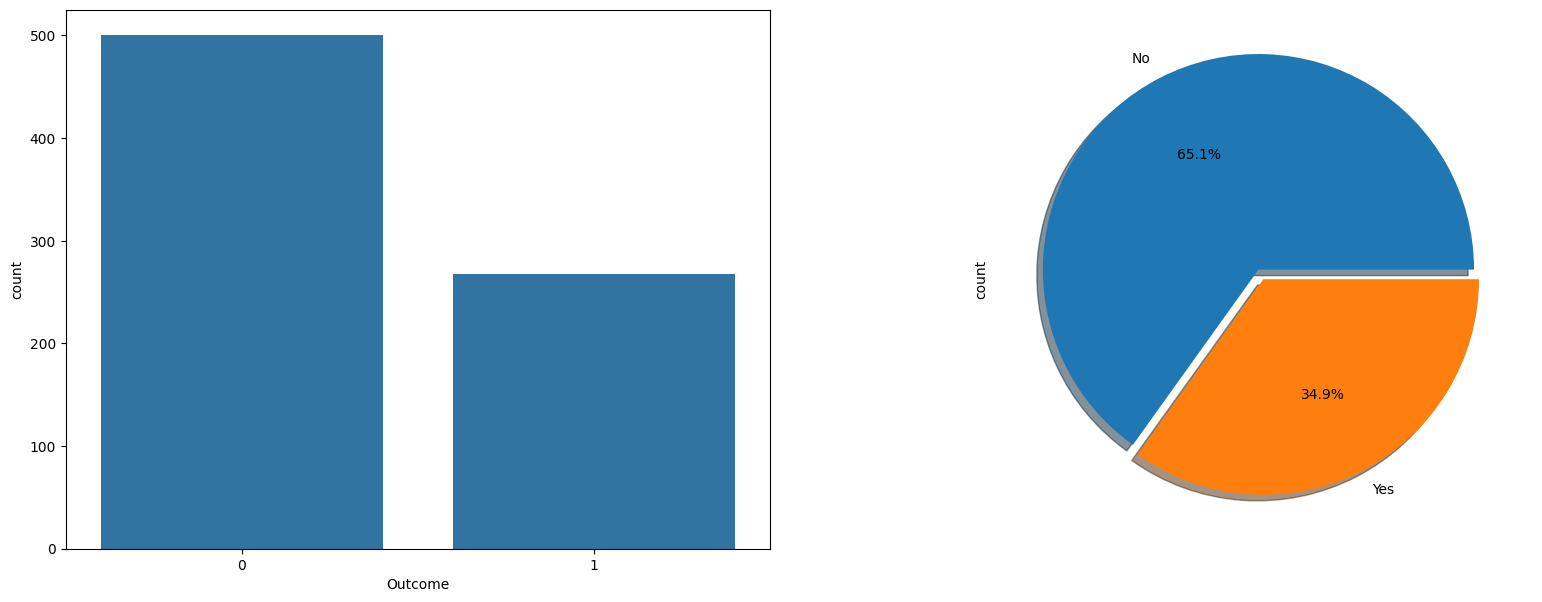

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(20,7))
sns.countplot(data=df, x="Outcome", ax=ax[0])
df["Outcome"].value_counts().plot.pie(explode=[0.05,0], autopct="%1.1f%%", labels=["No", "Yes"], shadow=True, ax=ax[1])
plt.show()

### Pregnancies

**Majority (65.1%)** patients do not have diabetes.

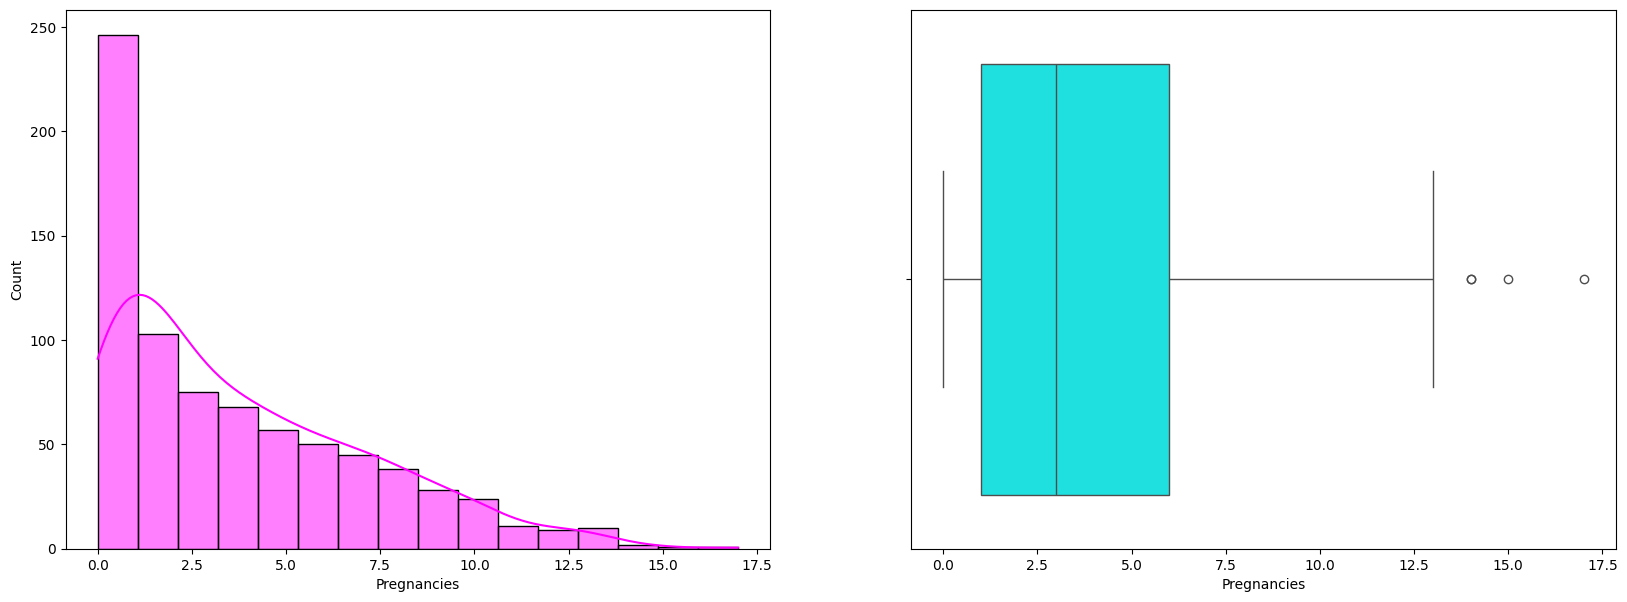

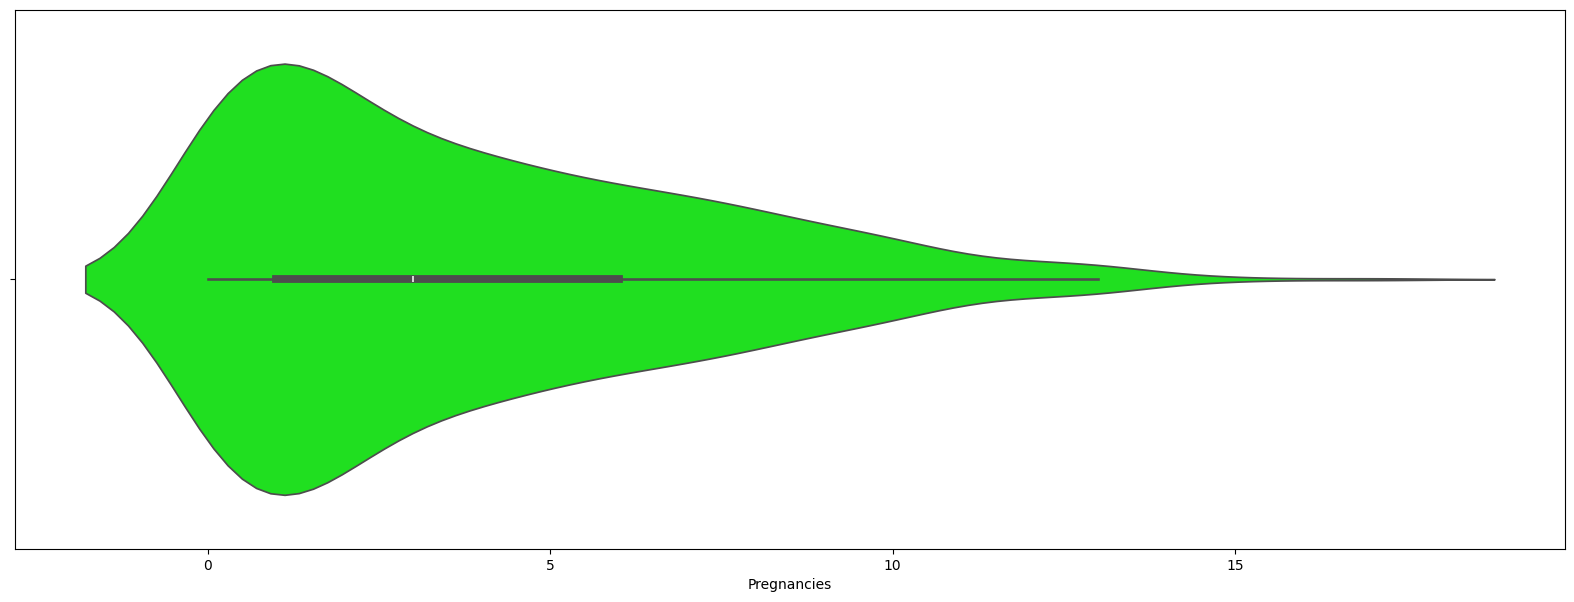

In [7]:
fig1, ax1 = plt.subplots(1,2,figsize=(20,7))
fig2, ax2 = plt.subplots(figsize=(20,7))
sns.histplot(data=df, x="Pregnancies", kde=True, ax=ax1[0], color='magenta')
sns.boxplot(data=df, x="Pregnancies", ax=ax1[1], color='aqua')
sns.violinplot(data=df, x="Pregnancies", ax=ax2, color='lime')
plt.show()

In [8]:
print(f"Median of Pregnancies: {df.Pregnancies.median()}")
print(f"Maximum of Pregnancies: {df.Pregnancies.max()}")
print(f"Minimum of Pregnancies: {df.Pregnancies.min()}")
print(f"Mean of Pregnancies: {df.Pregnancies.mean()}")

Median of Pregnancies: 3.0
Maximum of Pregnancies: 17
Minimum of Pregnancies: 0
Mean of Pregnancies: 3.8450520833333335


### Glucose

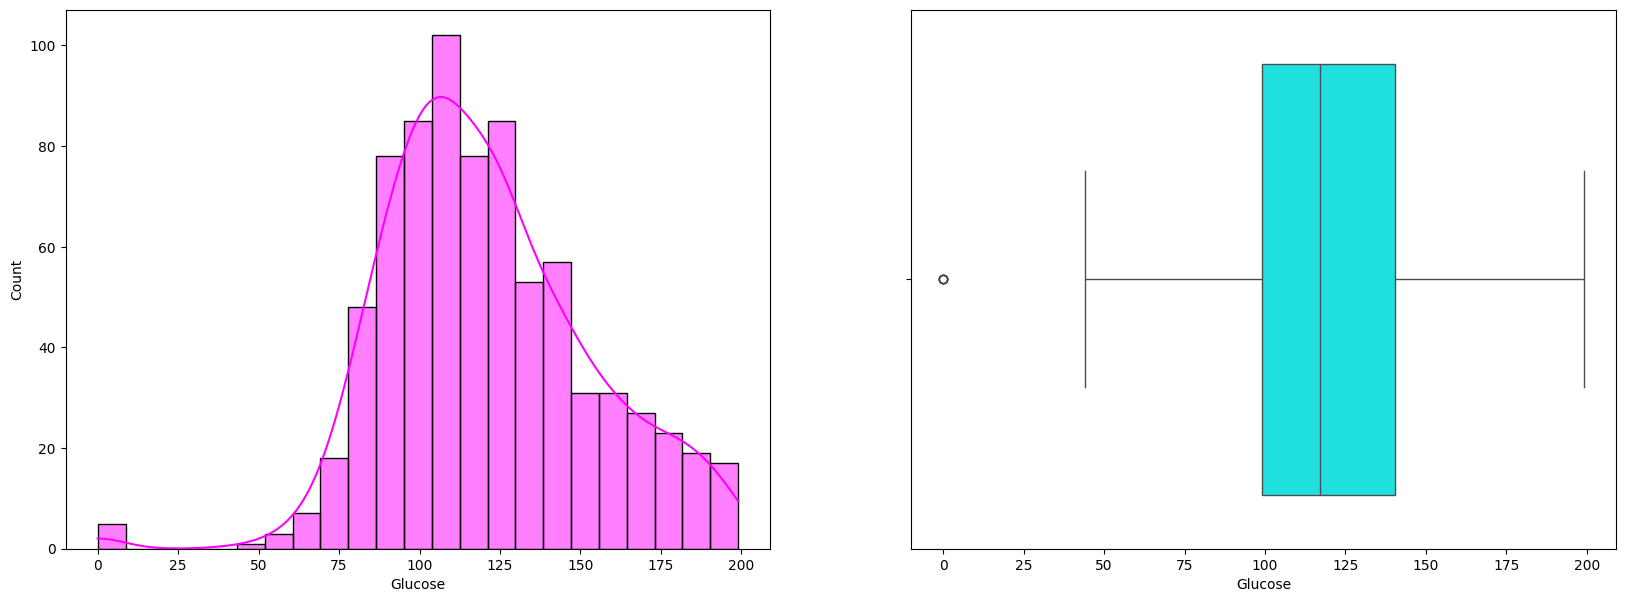

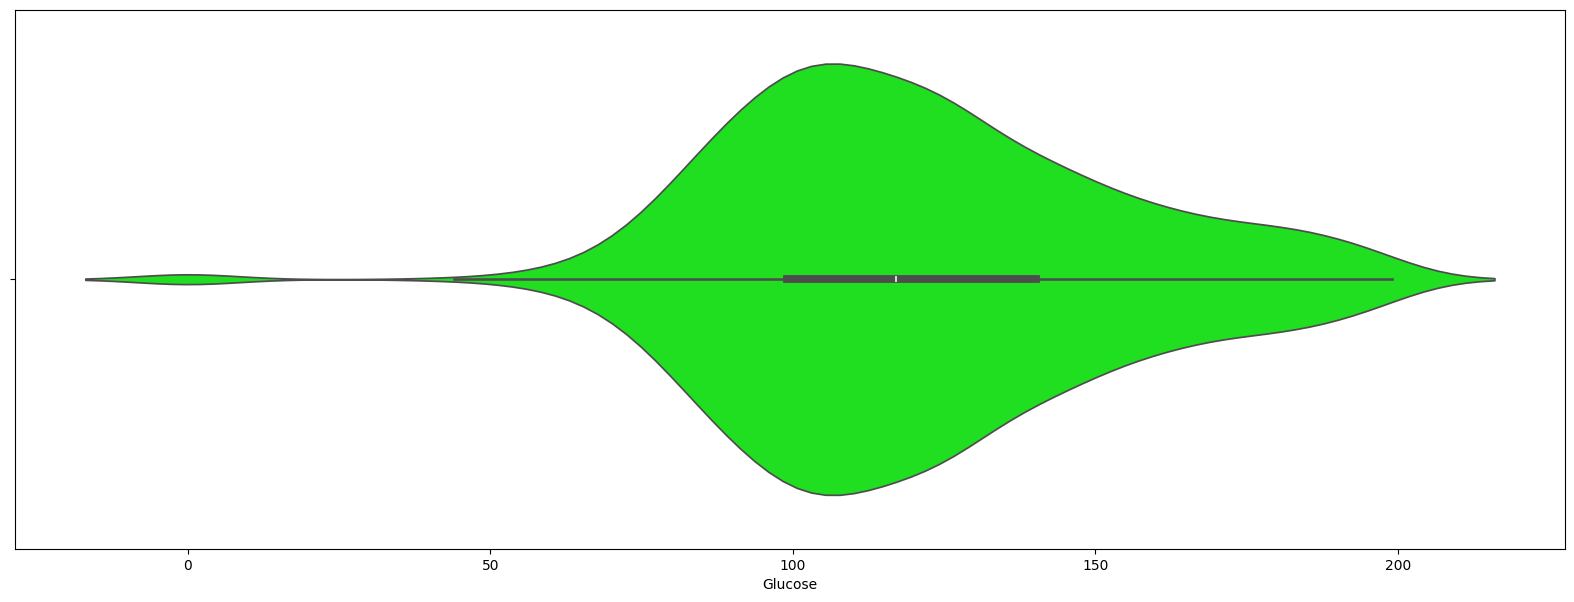

In [9]:
fig1, ax1 = plt.subplots(1,2,figsize=(20,7))
fig2, ax2 = plt.subplots(figsize=(20,7))
sns.histplot(data=df, x="Glucose", kde=True, ax=ax1[0], color='magenta')
sns.boxplot(data=df, x="Glucose", ax=ax1[1], color='aqua')
sns.violinplot(data=df, x="Glucose", ax=ax2, color='lime')
plt.show()

In [10]:
print(f"Median of Glucose: {df.Glucose.median()}")
print(f"Maximum of Glucose: {df.Glucose.max()}")
print(f"Minimum of Glucose: {df.Glucose.min()}")
print(f"Mean of Glucose: {df.Glucose.mean()}")

print(f"Rows with Glucose value of 0: {df[df.Glucose==0].shape[0]}")

Median of Glucose: 117.0
Maximum of Glucose: 199
Minimum of Glucose: 0
Mean of Glucose: 120.89453125
Rows with Glucose value of 0: 5


#### Replacing 0 values with median of field

In [11]:
df.Glucose = df.Glucose.replace(0, df.Glucose.median())
print(f"Minimum of Glucose after replacing 0: {df.Glucose.min()}")

Minimum of Glucose after replacing 0: 44


### Blood Pressure

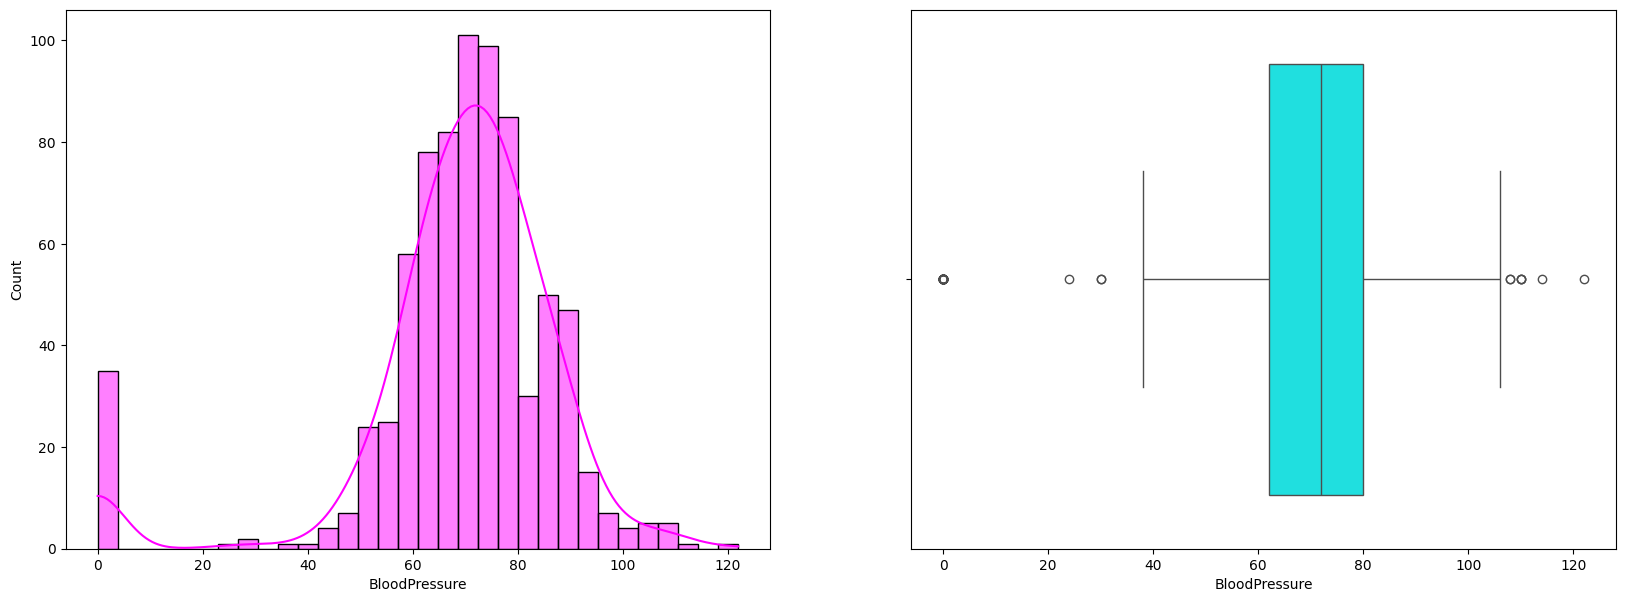

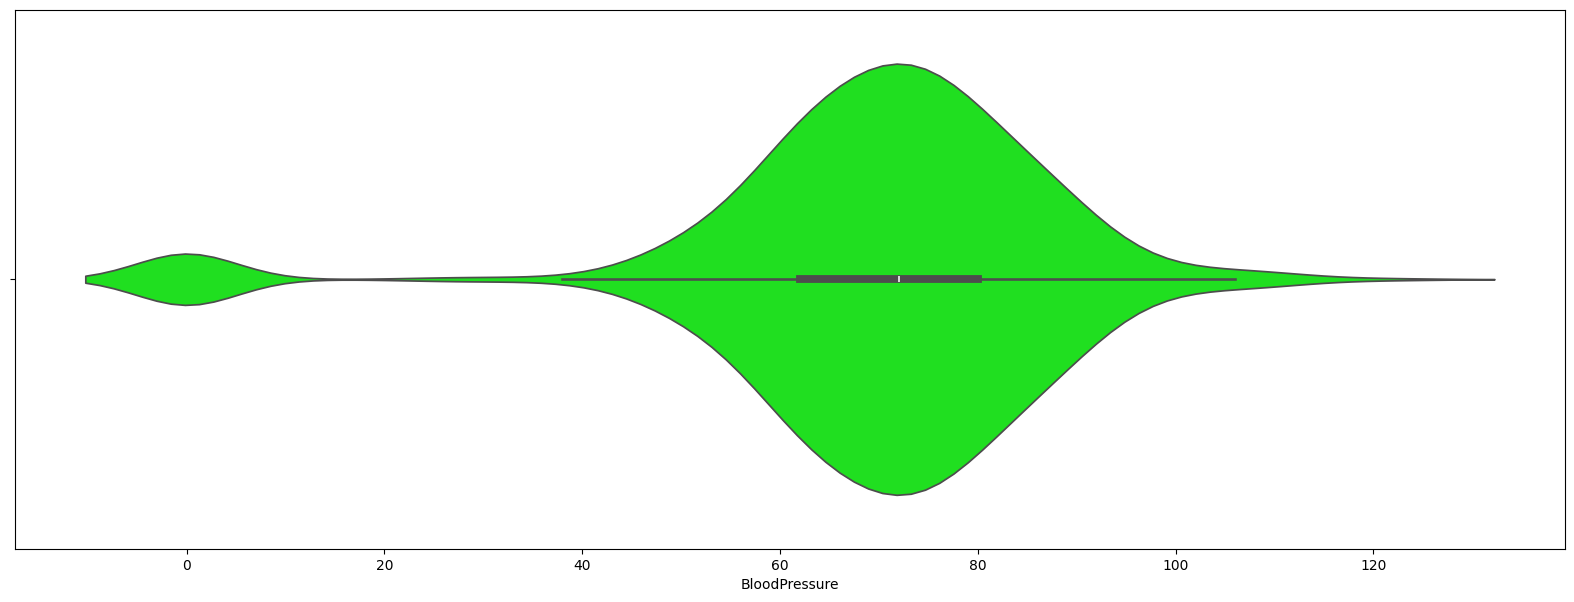

In [12]:
fig1, ax1 = plt.subplots(1,2,figsize=(20,7))
fig2, ax2 = plt.subplots(figsize=(20,7))
sns.histplot(data=df, x="BloodPressure", kde=True, ax=ax1[0], color='magenta')
sns.boxplot(data=df, x="BloodPressure", ax=ax1[1], color='aqua')
sns.violinplot(data=df, x="BloodPressure", ax=ax2, color='lime')
plt.show()

In [13]:
print(f"Median of Blood Pressure: {df.BloodPressure.median()}")
print(f"Maximum of Blood Pressure: {df.BloodPressure.max()}")
print(f"Minimum of Blood Pressure: {df.BloodPressure.min()}")
print(f"Mean of Blood Pressure: {df.BloodPressure.mean()}")

print(f"Rows with Blood Pressure value of 0: {df[df.BloodPressure==0].shape[0]}")

Median of Blood Pressure: 72.0
Maximum of Blood Pressure: 122
Minimum of Blood Pressure: 0
Mean of Blood Pressure: 69.10546875
Rows with Blood Pressure value of 0: 35


#### Replacing 0 values with median of field

In [14]:
df.BloodPressure = df.BloodPressure.replace(0, df.BloodPressure.median())
print(f"Minimum of Blood Pressure after replacing 0: {df.BloodPressure.min()}")

Minimum of Blood Pressure after replacing 0: 24


### Skin Thickness

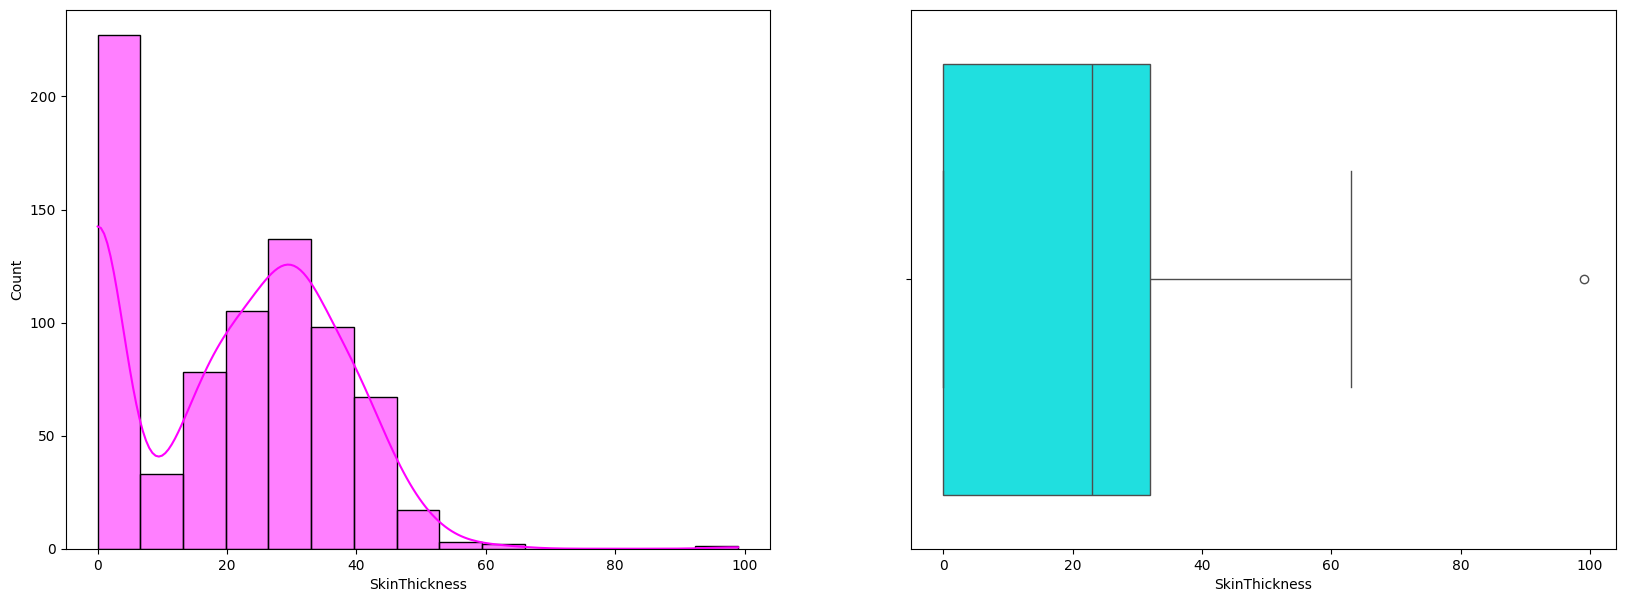

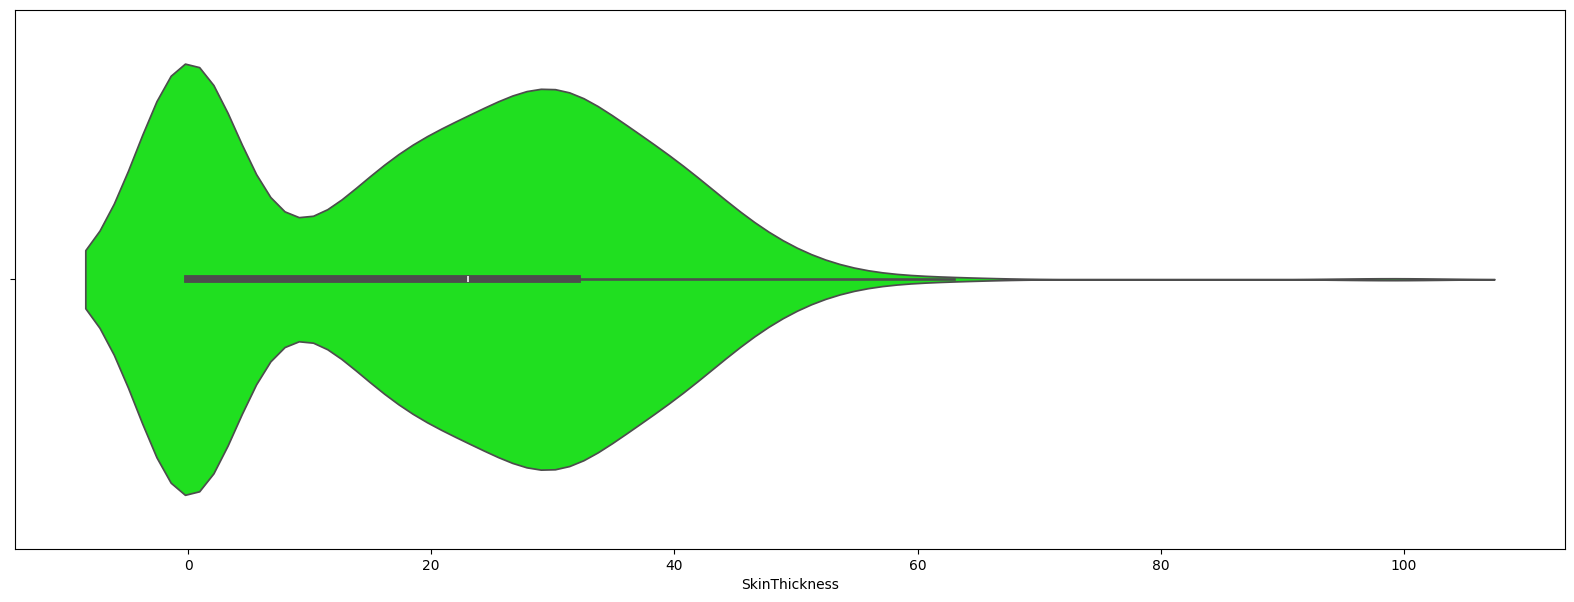

In [15]:
fig1, ax1 = plt.subplots(1,2,figsize=(20,7))
fig2, ax2 = plt.subplots(figsize=(20,7))
sns.histplot(data=df, x="SkinThickness", kde=True, ax=ax1[0], color='magenta')
sns.boxplot(data=df, x="SkinThickness", ax=ax1[1], color='aqua')
sns.violinplot(data=df, x="SkinThickness", ax=ax2, color='lime')
plt.show()

In [16]:
print(f"Median of Skin Thickness: {df.SkinThickness.median()}")
print(f"Maximum of Skin Thickness: {df.SkinThickness.max()}")
print(f"Minimum of Skin Thickness: {df.SkinThickness.min()}")
print(f"Mean of Skin Thickness: {df.SkinThickness.mean()}")

print(f"Rows with Skin Thickness value of 0: {df[df.SkinThickness>80].shape[0]}")

Median of Skin Thickness: 23.0
Maximum of Skin Thickness: 99
Minimum of Skin Thickness: 0
Mean of Skin Thickness: 20.536458333333332
Rows with Skin Thickness value of 0: 1


#### Replacing inappropriate value with median of field

In [17]:
df.SkinThickness = df.SkinThickness.replace(99, df.SkinThickness.median())
print(f"Maximum of Skin Thickness after replacing 0: {df.SkinThickness.max()}")

Maximum of Skin Thickness after replacing 0: 63


### Insulin

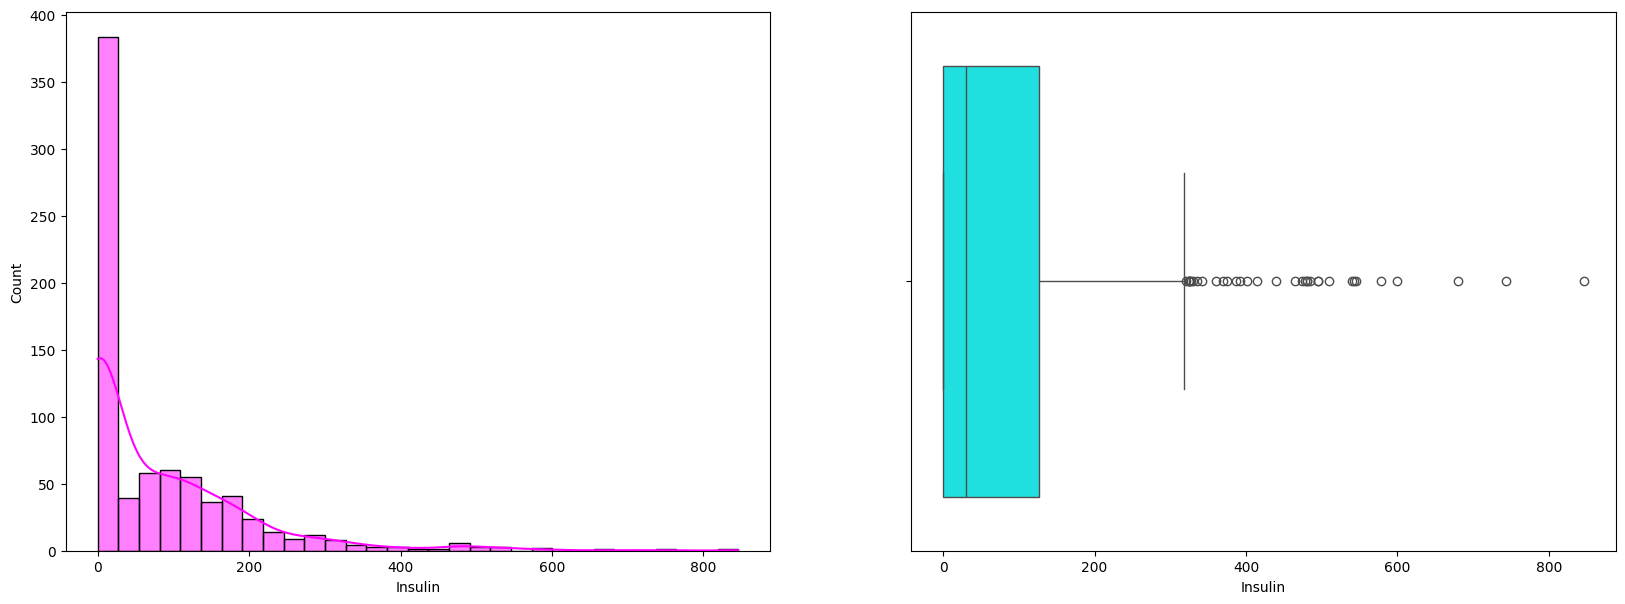

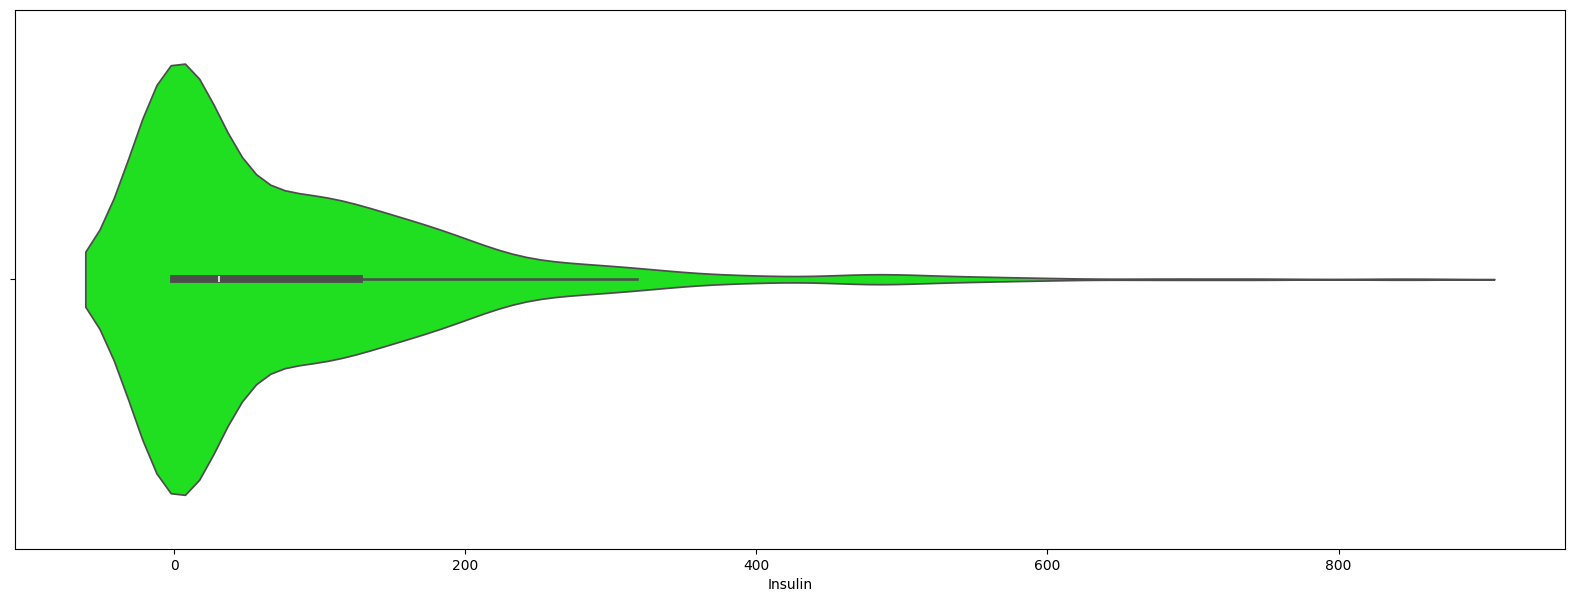

In [18]:
fig1, ax1 = plt.subplots(1,2,figsize=(20,7))
fig2, ax2 = plt.subplots(figsize=(20,7))
sns.histplot(data=df, x="Insulin", kde=True, ax=ax1[0], color='magenta')
sns.boxplot(data=df, x="Insulin", ax=ax1[1], color='aqua')
sns.violinplot(data=df, x="Insulin", ax=ax2, color='lime')
plt.show()

In [19]:
print(f"Median of Insulin: {df.Insulin.median()}")
print(f"Maximum of Insulin: {df.Insulin.max()}")
print(f"Minimum of Insulin: {df.Insulin.min()}")
print(f"Mean of Insulin: {df.Insulin.mean()}")

print(f"Rows with Insulin value of 0: {df[df.Insulin==0].shape[0]}")

Median of Insulin: 30.5
Maximum of Insulin: 846
Minimum of Insulin: 0
Mean of Insulin: 79.79947916666667
Rows with Insulin value of 0: 374


#### Replacing 0 values with median of field

In [20]:
df.Insulin = df.Insulin.replace(0, df.Insulin.median())
print(f"Minimum of Insulin after replacing 0: {df.Insulin.min()}")

Minimum of Insulin after replacing 0: 14.0


### BMI

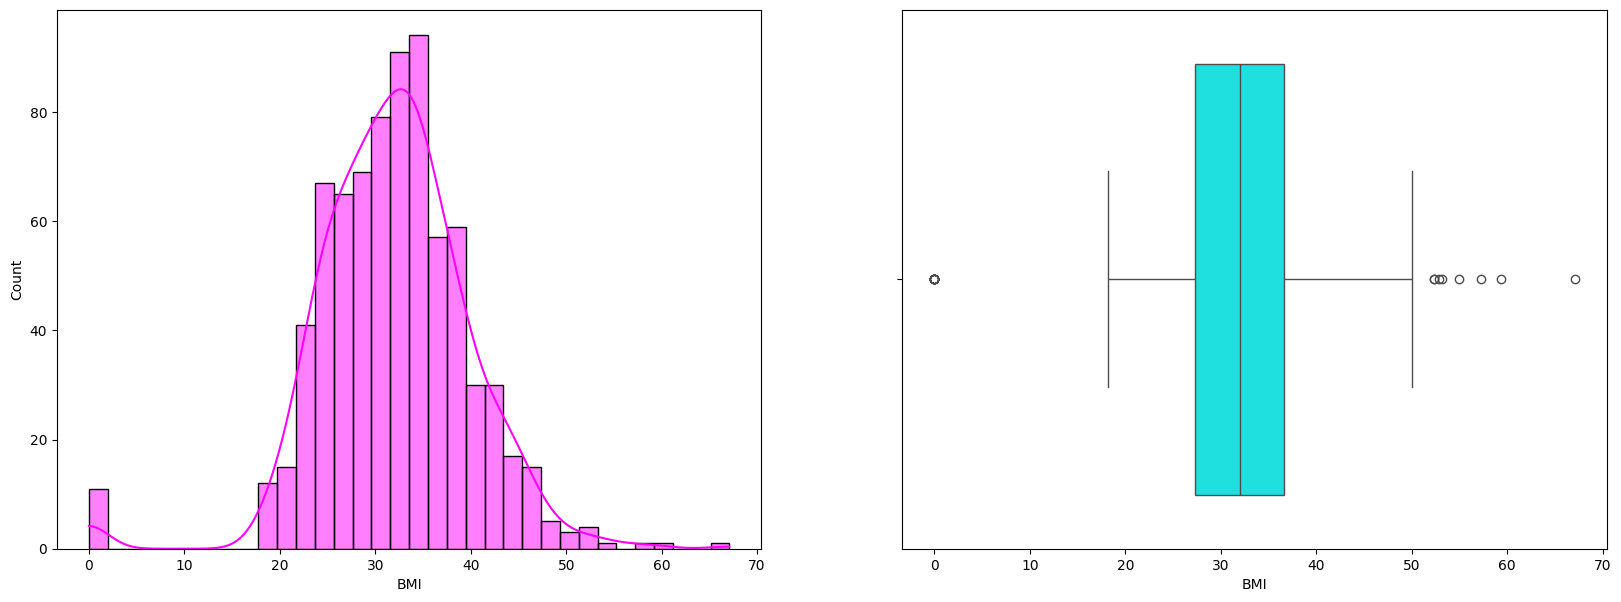

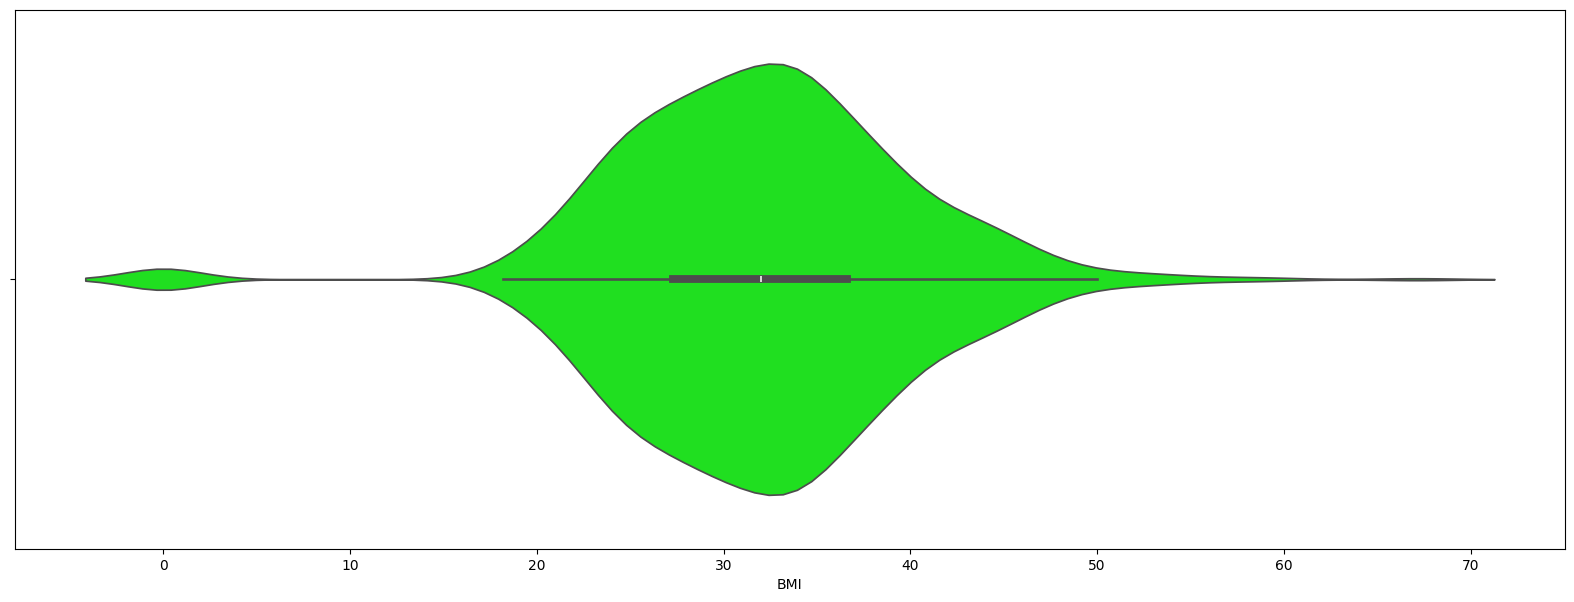

In [21]:
fig1, ax1 = plt.subplots(1,2,figsize=(20,7))
fig2, ax2 = plt.subplots(figsize=(20,7))
sns.histplot(data=df, x="BMI", kde=True, ax=ax1[0], color='magenta')
sns.boxplot(data=df, x="BMI", ax=ax1[1], color='aqua')
sns.violinplot(data=df, x="BMI", ax=ax2, color='lime')
plt.show()

In [22]:
print(f"Median of BMI: {df.BMI.median()}")
print(f"Maximum of BMI: {df.BMI.max()}")
print(f"Minimum of BMI: {df.BMI.min()}")
print(f"Mean of BMI: {df.BMI.mean()}")

print(f"Rows with BMI value of 0: {df[df.BMI==0].shape[0]}")

Median of BMI: 32.0
Maximum of BMI: 67.1
Minimum of BMI: 0.0
Mean of BMI: 31.992578124999998
Rows with BMI value of 0: 11


#### Replacing 0 values with median of field

In [23]:
df.BMI = df.BMI.replace(0, df.BMI.median())
print(f"Minimum of BMI after replacing 0: {df.BMI.min()}")

Minimum of BMI after replacing 0: 18.2


### Diabetes Pedigree Function

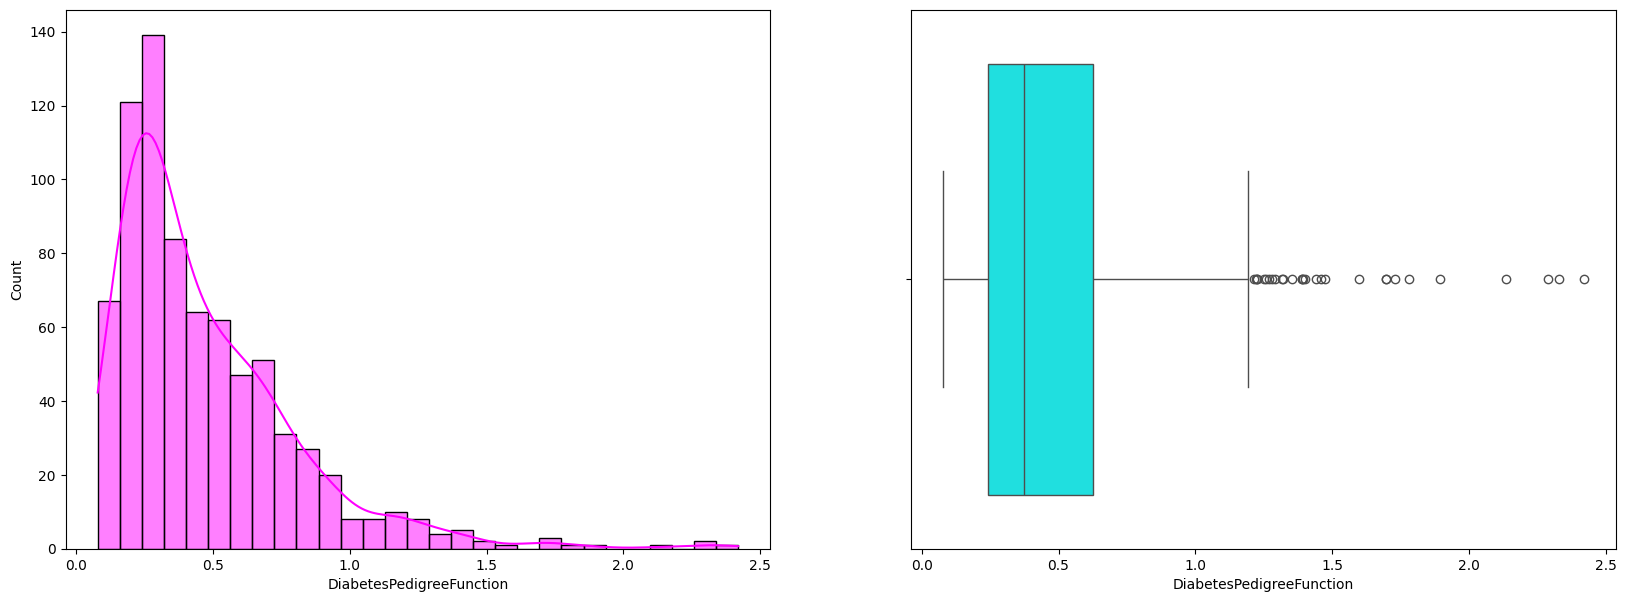

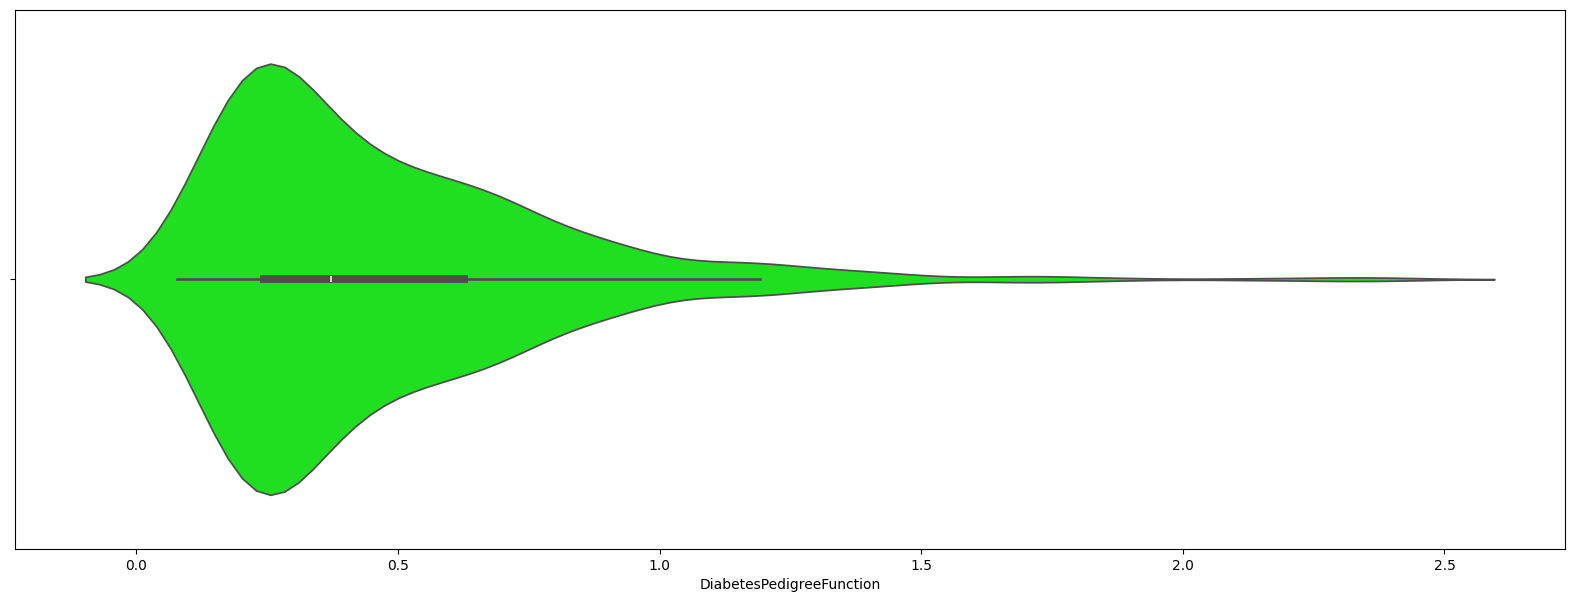

In [24]:
fig1, ax1 = plt.subplots(1,2,figsize=(20,7))
fig2, ax2 = plt.subplots(figsize=(20,7))
sns.histplot(data=df, x="DiabetesPedigreeFunction", kde=True, ax=ax1[0], color='magenta')
sns.boxplot(data=df, x="DiabetesPedigreeFunction", ax=ax1[1], color='aqua')
sns.violinplot(data=df, x="DiabetesPedigreeFunction", ax=ax2, color='lime')
plt.show()

In [25]:
print(f"Median of Diabetes Pedigree Function: {df.DiabetesPedigreeFunction.median()}")
print(f"Maximum of Diabetes Pedigree Function: {df.DiabetesPedigreeFunction.max()}")
print(f"Minimum of Diabetes Pedigree Function: {df.DiabetesPedigreeFunction.min()}")
print(f"Mean of Diabetes Pedigree Function: {df.DiabetesPedigreeFunction.mean()}")

Median of Diabetes Pedigree Function: 0.3725
Maximum of Diabetes Pedigree Function: 2.42
Minimum of Diabetes Pedigree Function: 0.078
Mean of Diabetes Pedigree Function: 0.47187630208333325


### Age

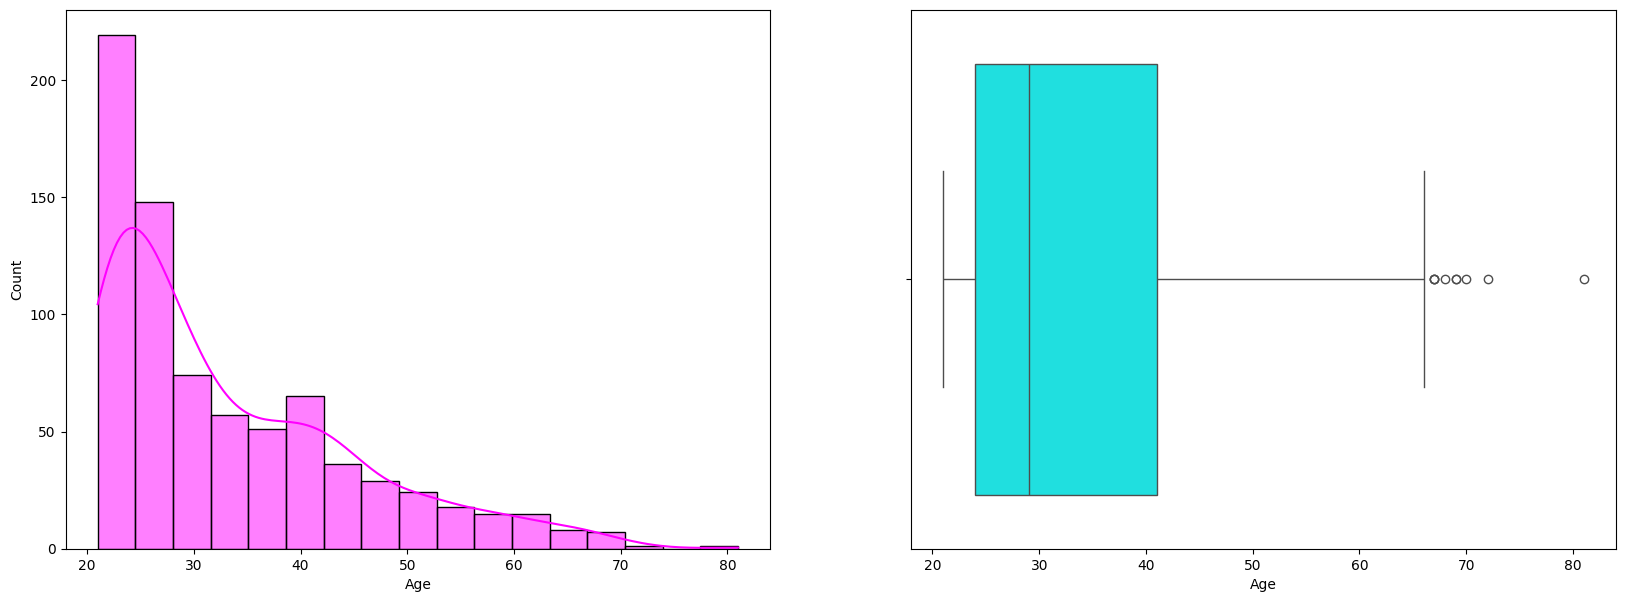

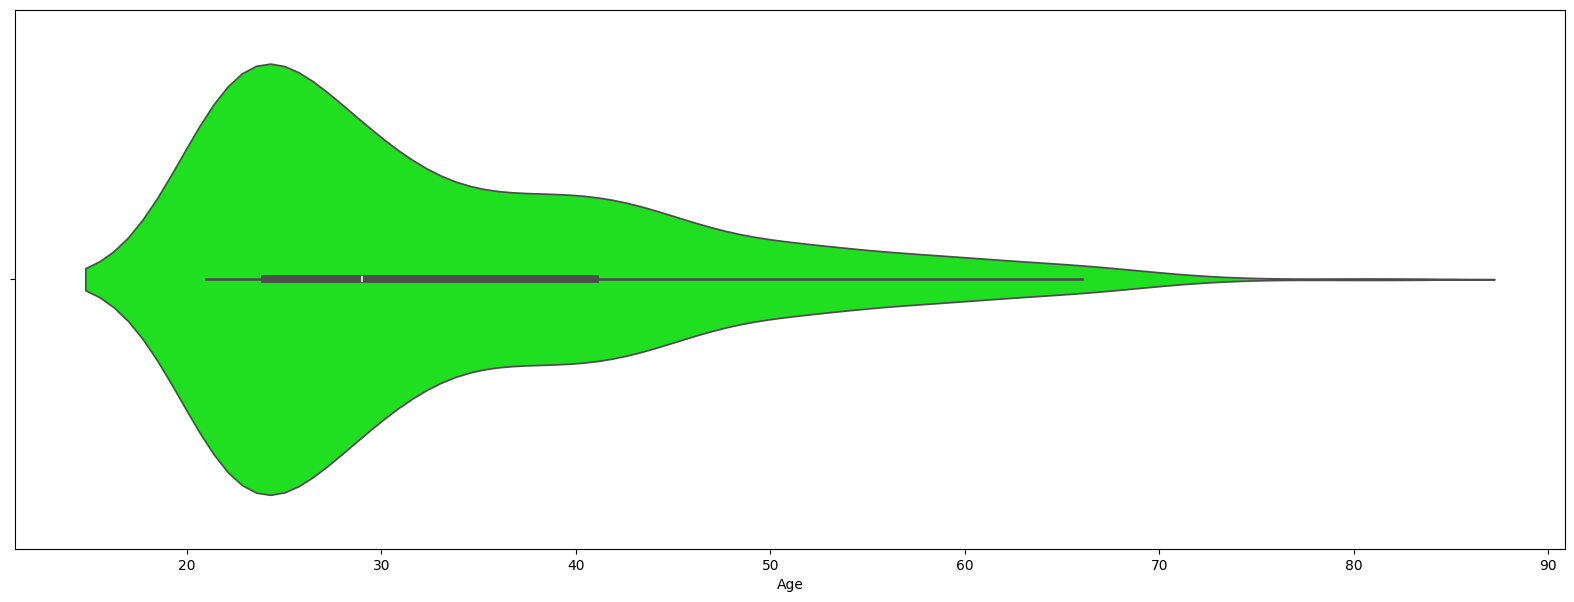

In [26]:
fig1, ax1 = plt.subplots(1,2,figsize=(20,7))
fig2, ax2 = plt.subplots(figsize=(20,7))
sns.histplot(data=df, x="Age", kde=True, ax=ax1[0], color='magenta')
sns.boxplot(data=df, x="Age", ax=ax1[1], color='aqua')
sns.violinplot(data=df, x="Age", ax=ax2, color='lime')
plt.show()

In [27]:
print(f"Median of Age: {df.Age.median()}")
print(f"Maximum of Age: {df.Age.max()}")
print(f"Minimum of Age: {df.Age.min()}")
print(f"Mean of Age: {df.Age.mean()}")

Median of Age: 29.0
Maximum of Age: 81
Minimum of Age: 21
Mean of Age: 33.240885416666664


## Multivariate Analysis

### Analysis of Pregnancies and Outcome

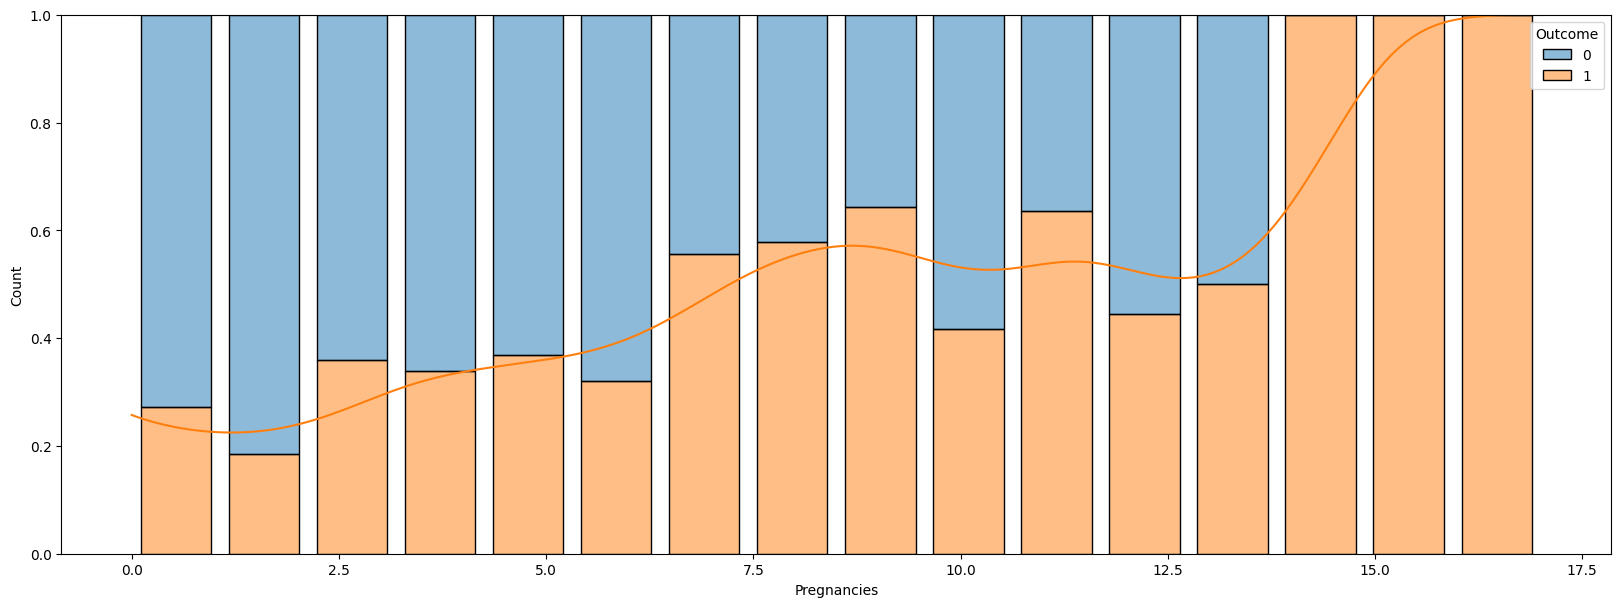

In [28]:
plt.figure(figsize=(20,7))
sns.histplot(data=df, x="Pregnancies", hue="Outcome", shrink=0.8, multiple = "fill", kde=True);

There is some positive linear correlation of *Pregnancies* with *Outcome.*

### Analysis of Glucose and Outcome

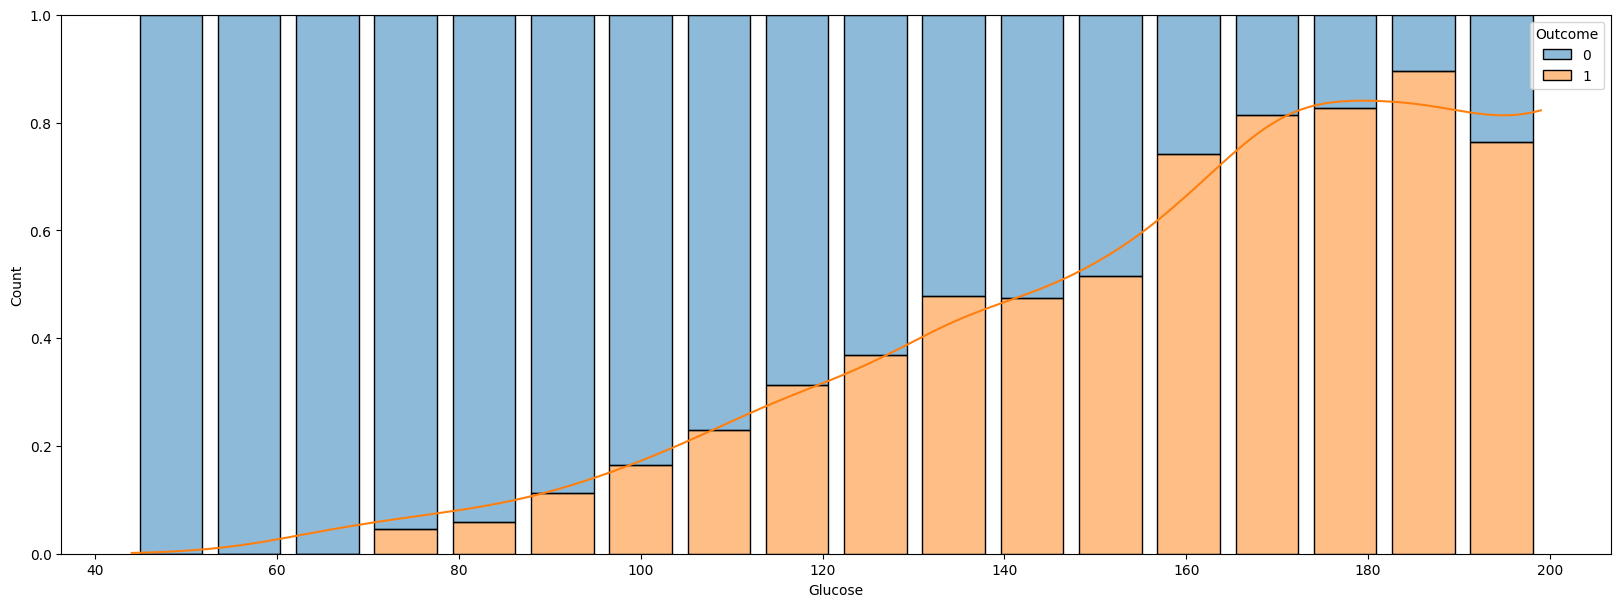

In [29]:
plt.figure(figsize=(20,7))
sns.histplot(data=df, x="Glucose", hue="Outcome", shrink=0.8, multiple = "fill", kde=True);

From the above plot, we see a **positive linear correlation.**
  * As the value of Glucose increases, the count of patients having diabetes increases.
  * Thus Glucose level has significant positive relation with diabetes.

### Analysis of Blood Pressure and Outcome

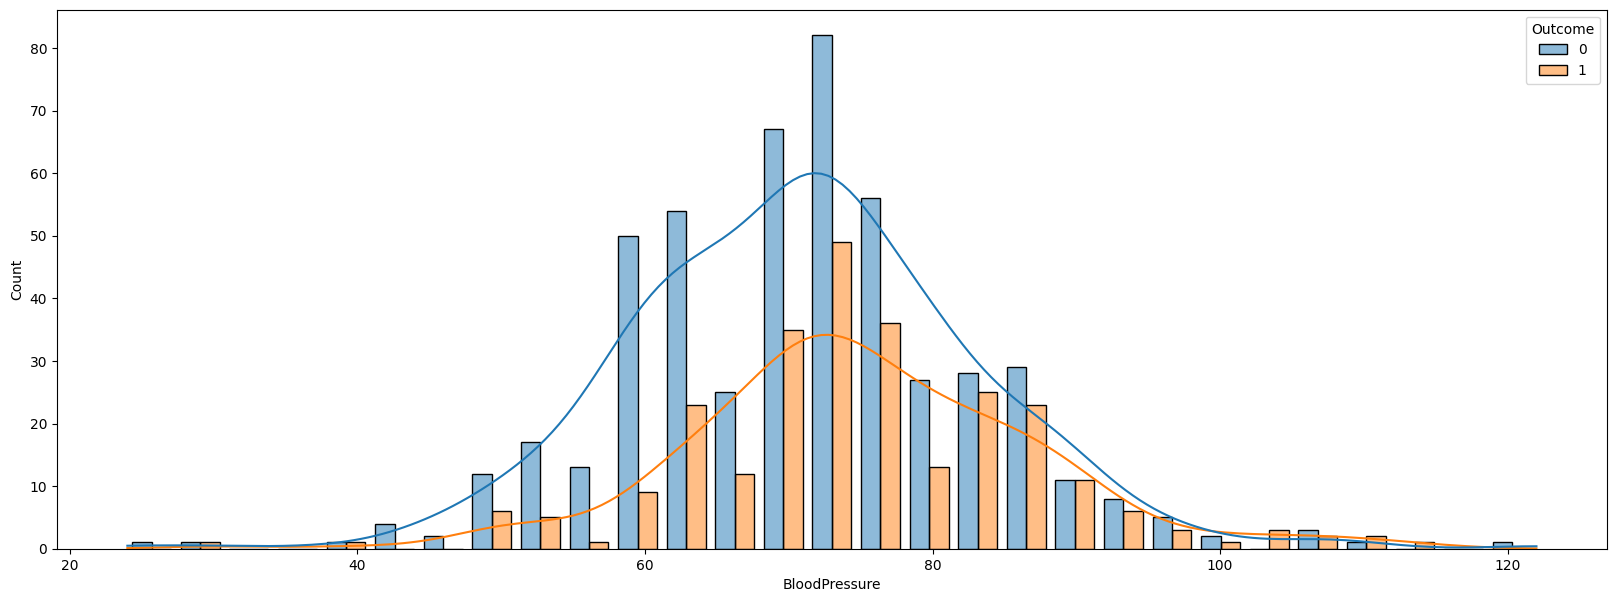

In [30]:
plt.figure(figsize=(20,7))
sns.histplot(data=df, x="BloodPressure", hue="Outcome", shrink=0.8, multiple = "dodge", kde=True);

From the above plot, we don't see any positive or negative linear correlation. There is non-linearity in the graph.
Thus Blood Pressure is not a cause of having diabetes in the person.

### Analysis of Diabetes Pedigree Function and Outcome

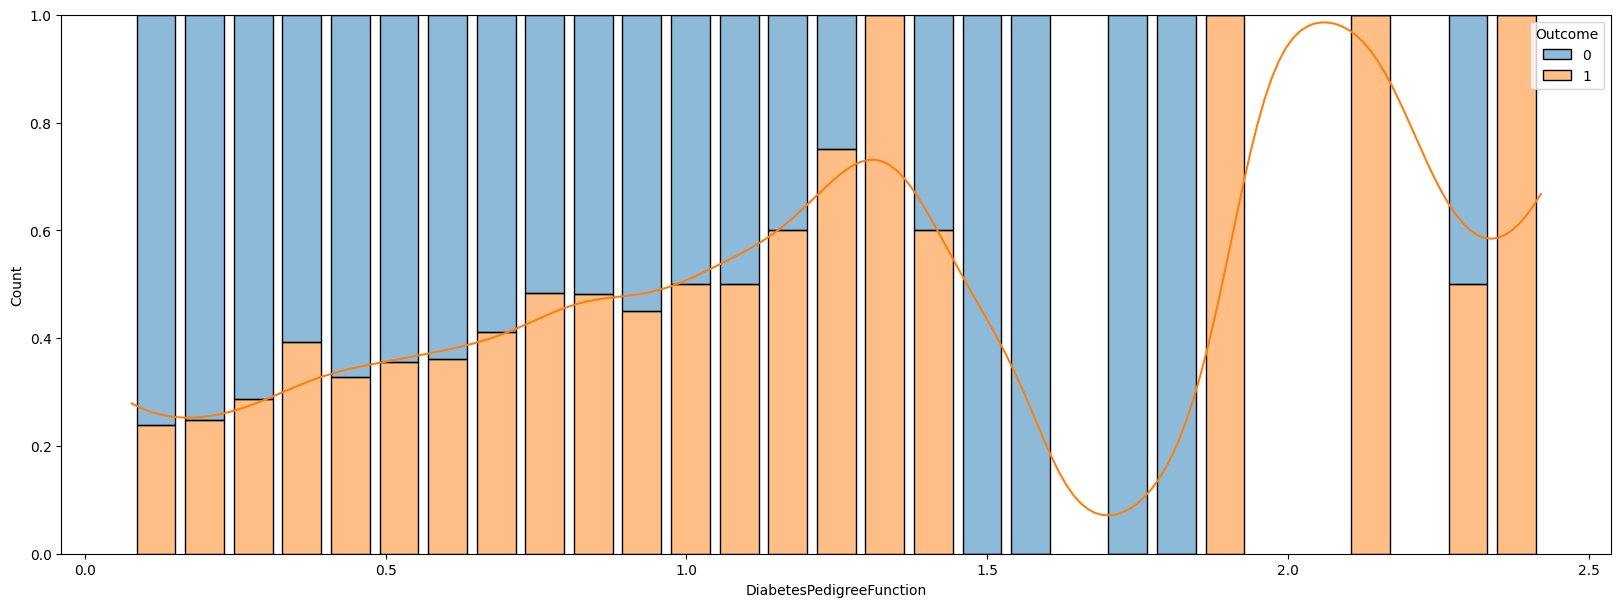

In [31]:
plt.figure(figsize=(20,7))
sns.histplot(data=df, x="DiabetesPedigreeFunction", hue="Outcome", shrink=0.8, multiple = "fill", kde=True);

There is some positive linear relationship between Diabetes Pedigree Function and outcome till 1.3. After if the outliers are left showing inappropriate graph.

### Analysis of BMI and Outcome

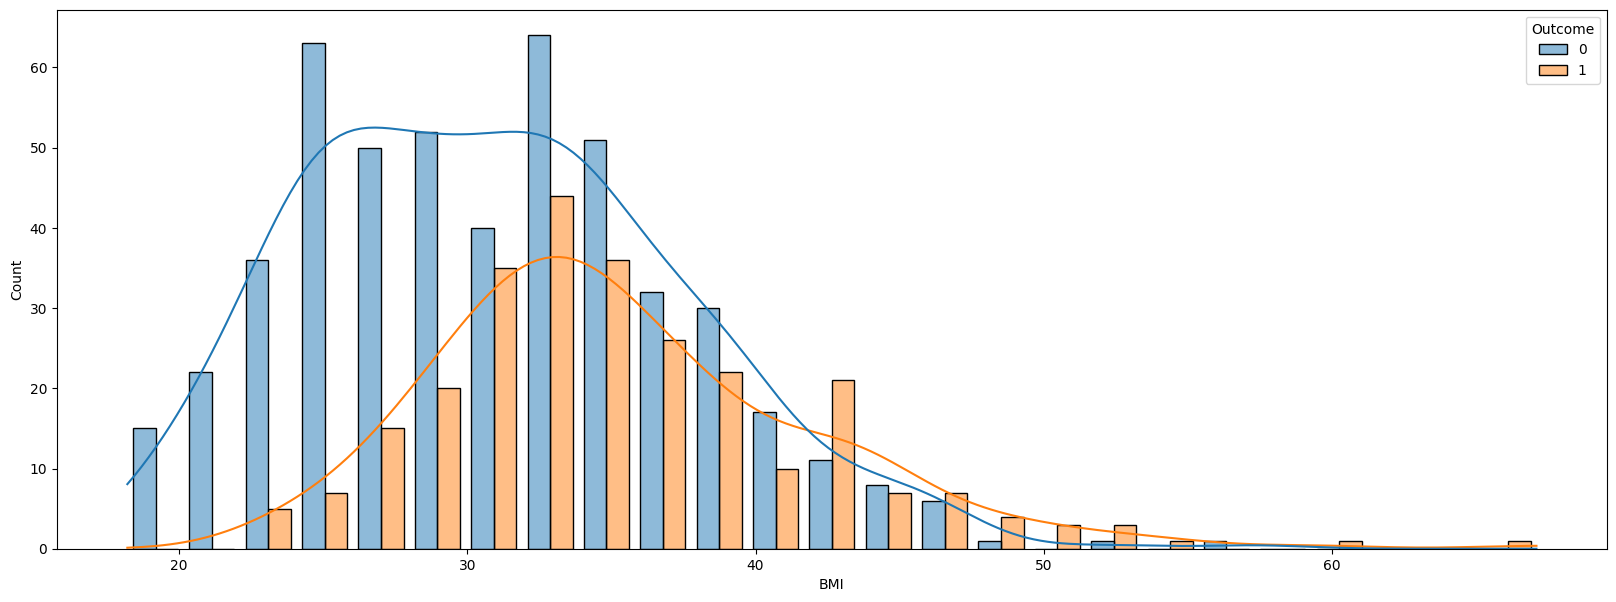

In [32]:
plt.figure(figsize=(20,7))
sns.histplot(data=df, x="BMI", hue="Outcome", shrink=0.8, multiple = "dodge", kde=True);

From the above plot, a **positive linear** correlation is evident for BMI.

In [33]:
df.Outcome[df.BMI<25][df.Outcome==1].sum()

7

If the BMI is less than 25 (<25) then the patient is very less likely to have diabetes due to having healthy weight range. But with the increase in BMI above 25 (>25) the number of patents having diabetes increases while number of patents not having diabetes remain constant. Above 36 (>36) BMI, the chances of having diabetes increases. And at last the patient is very high likely to have diabetes above 42.

### Analysis of Age and Outcome

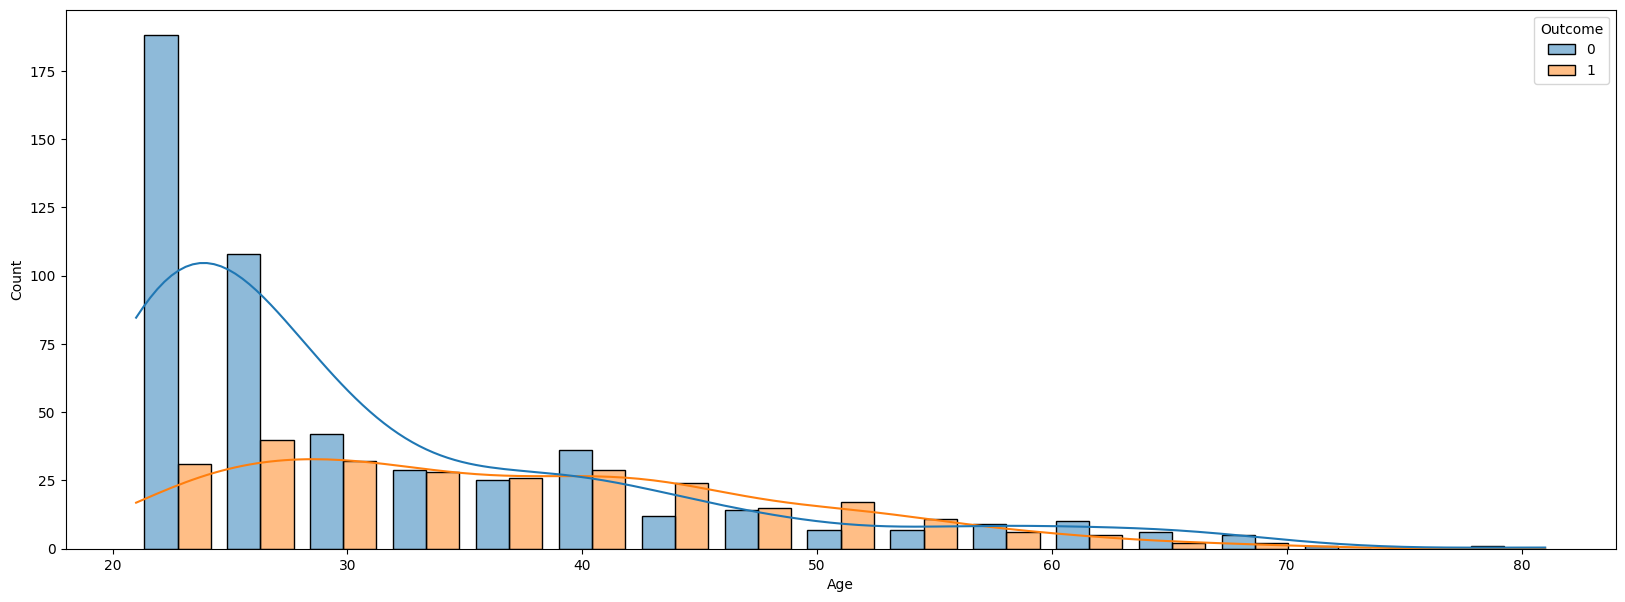

In [34]:
plt.figure(figsize=(20,7))
sns.histplot(data=df, x="Age", hue="Outcome", shrink=0.8, multiple = "dodge", kde=True);

For Age greater than 35 years, the chances of patients having diabetes increases as evident from the plot i.e. The number of patients having diabetes is more than the number of people **not** having diabetes. But, it does not hold true for ages above 60 **(60+)**. 
There is some positive linear relation though.

### Analyzing Correlations

In [35]:
corr_matrix = df.corr()

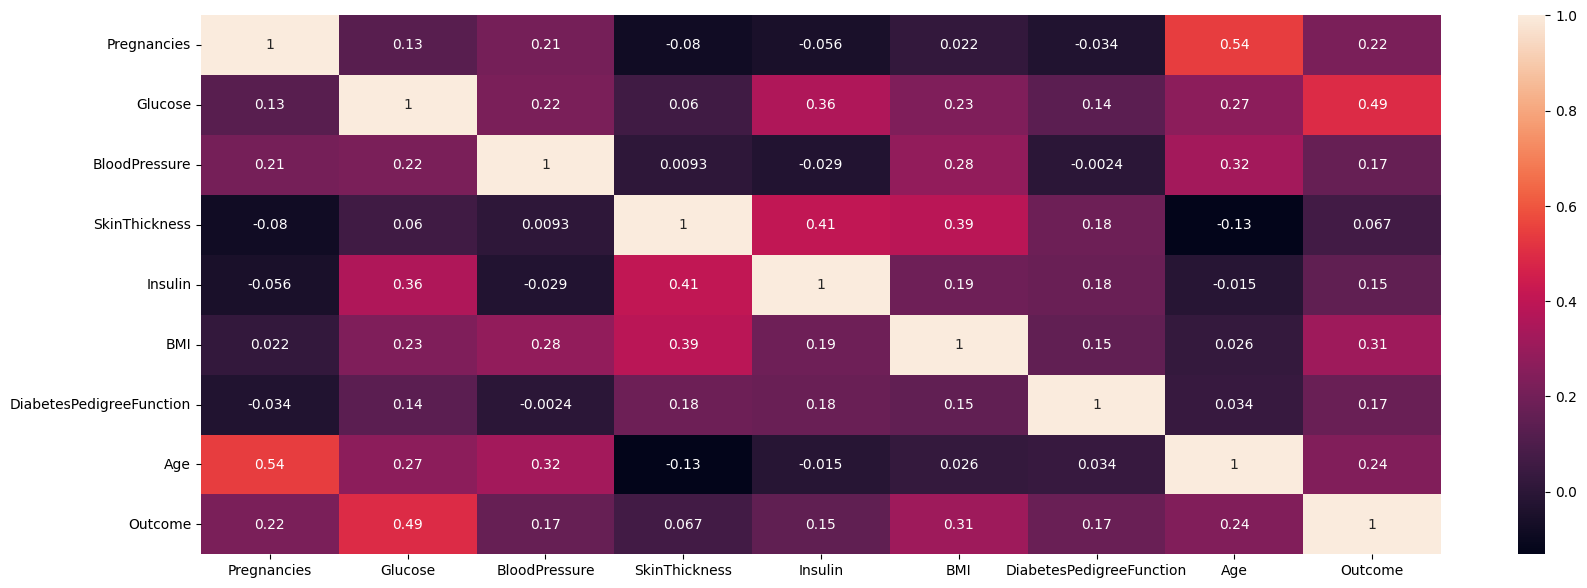

In [36]:
plt.figure(figsize=(20,7))
dataplot = sns.heatmap(data=corr_matrix, annot=True)

In [37]:
corr_matrix.Outcome.sort_values(ascending=False)[1:]

Glucose                     0.492782
BMI                         0.312249
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
BloodPressure               0.165723
Insulin                     0.148457
SkinThickness               0.067344
Name: Outcome, dtype: float64

We observe that:
 + Glucose has the maximum positive linear correlation with Outcome.
 + No feature has a negative linear correlation with Outcome.
 + Skin thickness has the lowest positive correlation with Outcome.

## DIABETES PREDICTION:

## Prevailing factors affecting diabetic patients

Glucose and BMI are the prevailing factors affecting diabetic patients. 
 1. With the increase in Glucose levels, number of patients having diabetes increases.
 2. BMI shows its cause for the patients to have diabetes after 25.

## Impact of age

For Age greater than 35 years, the chances of patients having diabetes increases as evident from the plot i.e. The number of patients having diabetes is more than the number of people **not** having diabetes. But, it does not hold true for ages above 60 **(60+)**. 
There is some positive linear relation though.

## Comparing other factors in patients with and without disease

Other factors in the patients affecting the diabetes condition:-
 1. **Pregnancies:-** Patients being pregnant for more than 6 time are more likely to have diabetes (about 2x) than the patients being pregnant at most 2 times.
 2. **Diabetes Pedigree Function:-** The patients having less Diabetes Pedigree Function are less likely to have diabetes than the patients having more Diabetes Pedigree Function. Thus it is also showing linear relationship till 1.3.